<a href="https://colab.research.google.com/github/harishsundaram07/KnowledgeDiscoveryInDatabases_Group4_Project/blob/main/KDD_Project_Deliverable2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group 4:

1.  Harikrishnan Sundaram
2.  Malhar Joshi
3. Yash Chaudhari
4. Dhruv Jani
****

#**AIM OF THE PROJECT:**
To draw insights from a Tennis dataset w.r.t players age and correlation with the win and loss trend and analyzing the change in participation and performance of the tennis players from major countries like USA, UK, etc. In the earlier days of Tennis, the players would retire by the age of 30, but in recent times, the players have been playing at the age of around 35 and performing well. We will be analyzing the change in the pattern of participation Among the tennis players.
****
#**RESEARCH QUESTIONS:**
1.	What is the win percentage of players having the age in the range of 20-25, 25-30, 30-35 vs 35 and above for male and female players?
2.	What is the different winning percentage of a player from a specific country on different surfaces? 
3.	The percentage of wins between players from the US vs other popular countries and between age groups ranging from 20-25, 25-30, 30-35 vs 35 and above. 
4.	What factor is influencing the change in the trend of all male and female players winning the championship? If it's the surface, the age, or some other reason.
****
#**ANALYSIS:**
For this project we will be using **Descriptive Analysis**.
Descriptive analysis is the process of using statistical techniques to describe or summarize a set of data. It is popular for its ability to generate accessible insights from otherwise uninterpreted data.

****



Export the zip file and place all the dataset in the directory.



#**Importing all necessary libraries**

In [ ]:
import pandas as pd
from glob import glob

import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize'] = (20,8)
mpl.rcParams['axes.grid'] = False

#**Reading all the datafiles for the male players**

In [ ]:
male_files = glob("atp*")

In [ ]:
male_files

#**Sorting the datafiles according to the year**

In [ ]:
male_files.sort()
male_files

#**Concatinating all the male players datafiles into a single dataframe**

In [ ]:
male_data = pd.concat ((pd.read_csv(file) for file in male_files), ignore_index= True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#**The final male players dataset:**

In [162]:
male_data.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1970-2029,Dublin,Grass,32,A,19700706,271,100106,NaN,NaN,Graham Stilwell,R,173.0,GBR,24.637919,125672,NaN,NaN,Kenneth Reid,U,NaN,IRL,NaN,6-0 6-4,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1970-2029,Dublin,Grass,32,A,19700706,272,209533,NaN,NaN,Harry Sheridan,U,NaN,IRL,NaN,209675,NaN,NaN,B Sweeney,U,NaN,IRL,NaN,6-2 6-4,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1970-2029,Dublin,Grass,32,A,19700706,273,100100,NaN,NaN,Tony Roche,L,178.0,AUS,25.136208,125716,NaN,NaN,James Buckley,U,NaN,IRL,33.223819,6-0 6-0,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1970-2029,Dublin,Grass,32,A,19700706,274,100060,NaN,NaN,Marty Riessen,R,185.0,USA,28.585900,209674,NaN,NaN,Frank Mcardle,U,NaN,IRL,NaN,6-1 6-2,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1970-2029,Dublin,Grass,32,A,19700706,275,100084,NaN,NaN,Tom Okker,R,178.0,NED,26.368241,209673,NaN,NaN,T Grane,U,NaN,NaN,NaN,6-2 6-0,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
male_data.shape

#**Reading all the datafiles for the female players**

In [ ]:
female_files = glob("wta*")

In [ ]:
female_files

#**Sorting the datafiles according to the year**

In [ ]:
female_files.sort()
female_files

#**Concatinating all the female players datafiles into a single dataframe**

In [ ]:
female_data = pd.concat ((pd.read_csv(file) for file in female_files), ignore_index= True)

#**The final female players dataset:**

In [ ]:
female_data.head()

In [ ]:
female_data.shape

#**Data Preprocessing Steps**
**Below are the established steps we’ll need to go through to make sure our data is successfully preprocessed.**

**1. Data quality assessment**

**2. Data cleaning**

**3. Data reduction**

**1. Data quality assessment**

First we take a good look at our data and get an idea of its overall quality, relevance to our project, and consistency. There are a number of data anomalies and inherent problems to look out for in almost any data set, for example:

Mismatched data types: When you collect data from many different sources, it may come to you in different formats.

Mixed data values: Perhaps different sources use different descriptors for features – for example, man or male. These value descriptors should all be made uniform.

Data outliers: Outliers can have a huge impact on data analysis results.

Missing data: Take a look for missing data fields, blank spaces in text, or unanswered survey questions. This could be due to human error or incomplete data. To take care of missing data, you’ll have to perform data cleaning.


Since all our data comes from a single source we can conclude that there are no inconsistencies with respect to the quality, data types and data values.

**2. Data cleaning**

Data cleaning is the process of adding missing data and correcting, repairing, or removing incorrect or irrelevant data from a data set. Dating cleaning is the most important step of preprocessing because it will ensure that your data is ready to go for your downstream needs.

Data cleaning will correct all of the inconsistent data you uncovered in your data quality assessment. Depending on the kind of data you’re working with, there are a number of possible cleaners you’ll need to run your data through.

Missing data
There are a number of ways to correct for missing data, but the two most common are:

Ignore the tuples: A tuple is an ordered list or sequence of numbers or entities. If multiple values are missing within tuples, you may simply discard the tuples with that missing information. This is only recommended for large data sets, when a few ignored tuples won’t harm further analysis.

Manually fill in missing data: This can be tedious, but is definitely necessary when working with smaller data sets.


#**Let us check our datasets for any missing data.**

In [ ]:
missing_male_data = male_data.isnull()
missing_male_data.head()

In [ ]:
missing_female_data = female_data.isnull()
missing_female_data.head()

**We can see from the above values that our datasets contain null values which could be harmful for our analysis.**

**Lets see the count of the null values for each columns and then find the overall percentage of those null values.**


**First lets do it for the Male players dataframe**

In [ ]:
sum_missing_male_data = missing_male_data.sum()
sum_missing_male_data

In [ ]:
len(male_data)

In [ ]:
percentage_missing_male_data = (sum_missing_male_data / len(male_data))*100
percentage_missing_male_data

**Now for the female players dataframe**

In [ ]:
sum_missing_female_data = missing_female_data.sum()
sum_missing_female_data

In [ ]:
len(female_data)

In [ ]:
percentage_missing_female_data = (sum_missing_female_data / len(female_data))*100
percentage_missing_female_data

**From the above analysis we can see that there are many columns in both the datafarmes with very high percentage of missing data. We will now drop those columns from the dataframes.**

In [ ]:
male_perc = 50.0
male_min_count = int(((100-male_perc)/100)*male_data.shape[0] + 1)
new_male_data = male_data.dropna( axis=1, 
                thresh=male_min_count)

female_perc = 70.0
female_min_count = int(((100-female_perc)/100)*female_data.shape[0] + 1)
new_female_data = female_data.dropna(axis =1, thresh = female_min_count)

In [ ]:
new_male_data.head()

In [ ]:
new_male_data.shape

In [ ]:
new_female_data.head()

In [ ]:
new_female_data.shape

**There are some columns with missing data which are useful for our analysis. Let us fill those columns with either a string or mean of the values in those columns.**

In [ ]:
percentage_missing_male_data

#**Changed the null values in Surface column  to 'Not Mentioned'**

In [ ]:
new_male_data.surface.fillna('Not Mentioned', inplace=True)
new_male_data.tail()

In [ ]:
frequency = new_male_data['surface'].value_counts(dropna=False)
frequency

#**Below we are changing the null values in winner_age & loser_age columns of Male players to its mean.**

In [ ]:
mean_male_winner_age = new_male_data['winner_age'].mean()
print(mean_male_winner_age)
mean_male_loser_age = new_male_data['loser_age'].mean()
print(mean_male_loser_age)

In [ ]:
new_male_data.winner_age.fillna(mean_male_winner_age, inplace=True)
new_male_data.loser_age.fillna(mean_male_loser_age, inplace=True)


#**Below we are changing the null values in winner_age & loser_age columns of Female players to its mean.**

In [ ]:
mean_female_loser_age = new_female_data['loser_age'].mean()
print(mean_female_loser_age)
mean_female_winner_age = new_female_data['winner_age'].mean()
print(mean_female_winner_age)

In [ ]:
new_female_data.loser_age.fillna(mean_female_loser_age, inplace=True)
new_female_data.winner_age.fillna(mean_female_winner_age, inplace=True)

In [ ]:
#frequency = new_male_data['winner_age'].value_counts(dropna=False)
#frequency

#**Below we are changing the null values in winner_ht & loser_ht columns of Male players to its mean.**



In [ ]:
mean_winner_ht = new_male_data['winner_ht'].mean()
print(mean_winner_ht)
new_male_data.winner_ht.fillna(mean_winner_ht, inplace=True)

In [ ]:
mean_loser_ht = new_male_data['loser_ht'].mean()
print(mean_loser_ht)
new_male_data.loser_ht.fillna(mean_loser_ht, inplace=True)

#**Below we are changing the null values in winner_ht & loser_ht columns of Female players to its mean.**

In [ ]:
mean_floser_ht = new_female_data['loser_ht'].mean()
print(mean_floser_ht)
new_female_data.loser_ht.fillna(mean_floser_ht, inplace=True)

In [ ]:
mean_fwinner_ht = new_female_data['winner_ht'].mean()
print(mean_fwinner_ht)
new_female_data.winner_ht.fillna(mean_fwinner_ht, inplace=True)

**3. Data reduction**
The more data you’re working with, the harder it will be to analyze, even after cleaning and transforming it. Depending on your task at hand, you may actually have more data than you need. Data reduction not only makes the analysis easier and more accurate, but cuts down on data storage.

It will also help identify the most important features to the process at hand.

Attribute selection: Similar to discreditization, attribute selection can fit your data into smaller pools. It, essentially, combines tags or features, so that tags like male/female and professor could be combined into male professor/female professor.

Numerosity reduction: This will help with data storage and transmission. You can use a regression model, for example, to use only the data and variables that are relevant to your analysis.

Dimensionality reduction: This, again, reduces the amount of data used to help facilitate analysis and downstream processes. Algorithms like K-nearest neighbors use pattern recognition to combine similar data and make it more manageable.


#**We will now drop all the columns from the Male and Female Players Dataframes to reduce our dataset and make it more efficient for our Descriptive Analysis.**

In [163]:
new_female_data.drop(new_female_data.columns.difference(['tourney_name','surface' , 'winner_name' , 'winner_hand' , 'winner_age' , 'winner_ht' , 'winner_ioc' , 'loser_name' , 'loser_hand' , 'loser_age' , 'loser_ht' , 'loser_ioc' ,'round']), 1, inplace=False)


,tourney_name,surface,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,round
0,Australian Open,Grass,Caroline Langsford,U,172.67122,AUS,23.521973,Sally Irvine,U,172.294313,AUS,23.444970,R64
1,Australian Open,Grass,Helen Amos,U,172.67122,AUS,21.555099,Caroline Cooper,U,172.294313,AUS,23.444970,R64
2,Australian Open,Grass,Norma Marsh,U,172.67122,AUS,34.017796,Sharon Thomson,U,172.294313,AUS,23.444970,R64
3,Australian Open,Grass,Vicki Lancaster Kerr,U,172.67122,AUS,18.981520,Theresa Van Haren,U,172.294313,AUS,23.444970,R64
4,Australian Open,Grass,Sandra Walsham,U,172.67122,AUS,23.521973,Judy Harris,U,172.294313,AUS,23.444970,R64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
143752,BJK Cup Playoffs: NED vs CHN,Clay,Arantxa Rus,L,180.00000,NED,30.343600,Xin Yu Wang,R,182.000000,CHN,19.556468,RR
143753,BJK Cup Playoffs: ROU vs ITA,Hard,Elisabetta Cocciaretto,R,172.67122,ITA,20.224504,Irina Maria Bara,R,172.294313,ROU,26.083504,RR
143754,BJK Cup Playoffs: ROU vs ITA,Hard,Martina Trevisan,L,160.00000,ITA,27.452430,Mihaela Buzarnescu,L,172.294313,ROU,32.952772,RR
143755,BJK Cup Playoffs: ROU vs ITA,Hard,Elena Gabriela Ruse,U,172.67122,ROU,23.444216,Jasmine Paolini,R,172.294313,ITA,25.284052,RR


In [164]:
new_male_data.drop(new_male_data.columns.difference(['tourney_name','surface' , 'winner_name' , 'winner_hand' , 'winner_age' , 'winner_ht' , 'winner_ioc' , 'loser_name' , 'loser_hand' , 'loser_age' , 'loser_ht' , 'loser_ioc','round' ]), 1, inplace=False)

,tourney_name,surface,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,round
0,Dublin,Grass,Graham Stilwell,R,173.000000,GBR,24.637919,Kenneth Reid,U,184.217894,IRL,25.733056,R32
1,Dublin,Grass,Harry Sheridan,U,184.449588,IRL,25.679201,B Sweeney,U,184.217894,IRL,25.733056,R32
2,Dublin,Grass,Tony Roche,L,178.000000,AUS,25.136208,James Buckley,U,184.217894,IRL,33.223819,R32
3,Dublin,Grass,Marty Riessen,R,185.000000,USA,28.585900,Frank Mcardle,U,184.217894,IRL,25.733056,R32
4,Dublin,Grass,Tom Okker,R,178.000000,NED,26.368241,T Grane,U,184.217894,NaN,25.733056,R32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
176453,Nur-Sultan,Hard,Lorenzo Musetti,R,185.000000,ITA,19.550992,Marc Polmans,R,184.217894,AUS,24.386037,R32
176454,Nur-Sultan,Hard,Soon Woo Kwon,R,180.000000,KOR,23.800137,Evgeny Donskoy,R,185.000000,RUS,31.367556,R32
176455,Nur-Sultan,Hard,Egor Gerasimov,R,196.000000,BLR,28.856947,Benoit Paire,R,196.000000,FRA,32.369610,R32
176456,Nur-Sultan,Hard,Carlos Taberner,R,184.449588,ESP,24.117728,Ricardas Berankis,R,175.000000,LTU,31.249829,R32


#**Plotting some graphs to better understand our datasets**

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


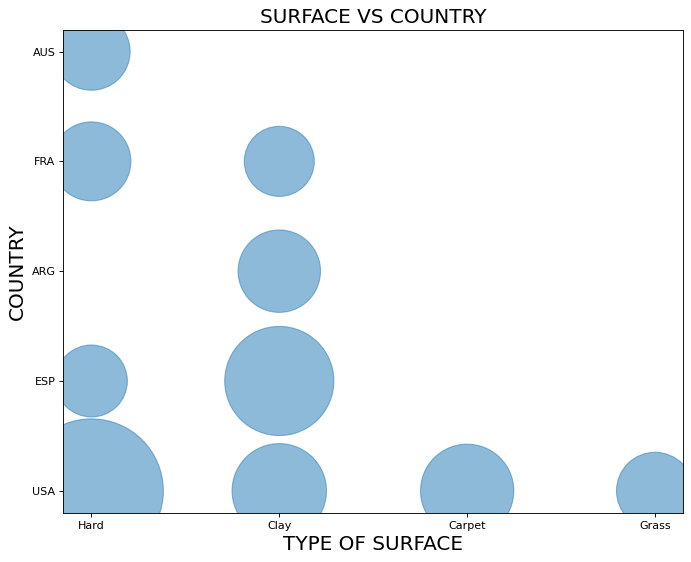

In [161]:

new_male_data.winner_ioc.fillna('Test', inplace=True)
plt.figure(figsize=(10, 8), dpi=80)
plt_1 = new_male_data[['surface','winner_ioc','winner_id']].groupby(['surface','winner_ioc']).size().reset_index(name='counts').sort_values('counts',ascending=False).head(10)

N = 50
x = plt_1['surface']
y = plt_1['winner_ioc']
s=plt_1['counts']
#colors = np.random.rand(len())

plt.scatter(x, y,s, alpha=0.5)

plt.title('SURFACE VS COUNTRY', fontsize=18)
plt.xlabel("TYPE OF SURFACE", fontsize=18)
plt.ylabel("COUNTRY", fontsize=18)

plt.show()

**The above graph gives a view of country vs surface which can help us understand which country plays better on which surface. This can help us understand where players of a certain country need to improve. Eg: USA plays very good on Hard surfaces as compared to Grass. This shows us that players in United States need to focus on Grass courts more.**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


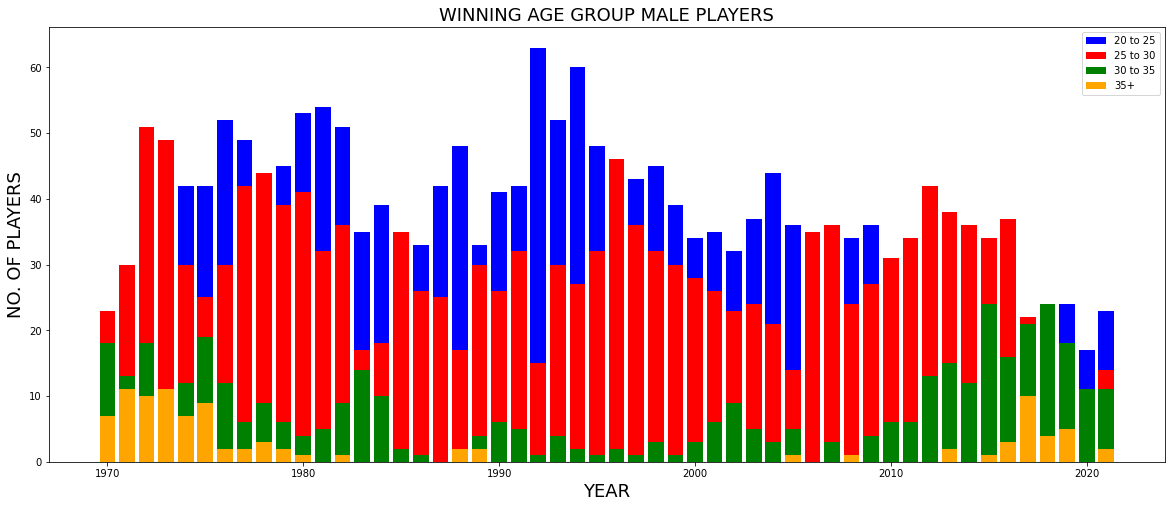

In [158]:
plt_2 = new_male_data[new_male_data['round'] == 'F']

conditions = [
    (plt_2['winner_age'] >=20) & (plt_2['winner_age'] <25),
    (plt_2['winner_age'] >=25) & (plt_2['winner_age'] <30),
    (plt_2['winner_age'] >=30) & (plt_2['winner_age'] <35),
    (plt_2['winner_age'] >35)  ]

values = ['20 to 25', '25 to 30', '30 to 35', '35+']
plt_2['AgeGroup'] = np.select(conditions, values)
plt_2 = plt_2[['AgeGroup','tourney_date']]
plt_2['tourney_date'] = plt_2['tourney_date']//10000
plt_2 = plt_2.groupby(['AgeGroup','tourney_date']).size().reset_index(name='counts').sort_values('counts',ascending=False)
plt_2 = plt_2[plt_2['tourney_date'] >= 1970]

plt_2_1 = plt_2[plt_2['AgeGroup'] == '20 to 25']
plt_2_2 = plt_2[plt_2['AgeGroup'] == '25 to 30']
plt_2_3 = plt_2[plt_2['AgeGroup'] == '30 to 35']
plt_2_4 = plt_2[plt_2['AgeGroup'] == '35+']


plt.bar(plt_2_1['tourney_date'],plt_2_1['counts'],color = 'blue')
plt.bar(plt_2_2['tourney_date'],plt_2_2['counts'],color = 'red')
plt.bar(plt_2_3['tourney_date'],plt_2_3['counts'],color = 'green')
plt.bar(plt_2_4['tourney_date'],plt_2_4['counts'],color = 'orange')

plt.title('WINNING AGE GROUP MALE PLAYERS', fontsize=18)
plt.xlabel("YEAR", fontsize=18)
plt.ylabel("NO. OF PLAYERS", fontsize=18)

plt.legend(values)

plt.show()

**The above graph gives a view of age vs year of male players, which shows us which age group performed well given an year. The colors represent the following**

**1. Blue : Ages 20 to 25**

**2. Red: Ages 25 to 30**

**3. Green: Ages 30 to 35**

**4. Orange: Ages 35 and above**

**As we can see, players between the ages of 25 and 30 had consistent wins in games as compared to other age groups.**

**Age group 20 to 25 had some years with higher win percentage but weren't consistent for long.**

**Age groups 30 to 35 and 35 and above had the worst win percentages.**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


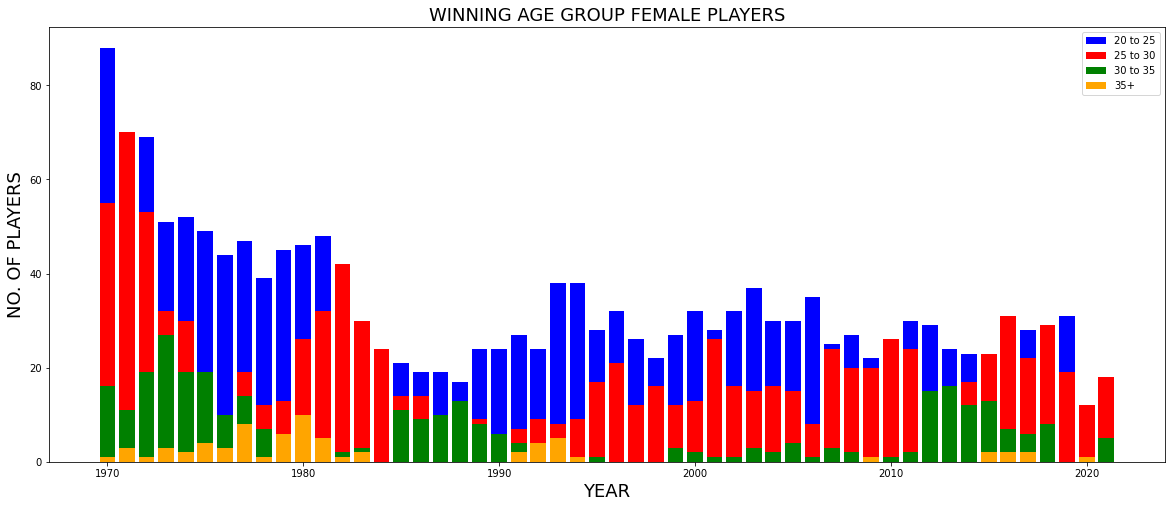

In [160]:
plt_2 = new_female_data[new_female_data['round'] == 'F']

conditions = [
    (plt_2['winner_age'] >=20) & (plt_2['winner_age'] <25),
    (plt_2['winner_age'] >=25) & (plt_2['winner_age'] <30),
    (plt_2['winner_age'] >=30) & (plt_2['winner_age'] <35),
    (plt_2['winner_age'] >35)  ]

values = ['20 to 25', '25 to 30', '30 to 35', '35+']
plt_2['AgeGroup'] = np.select(conditions, values)
plt_2 = plt_2[['AgeGroup','tourney_date']]
plt_2['tourney_date'] = plt_2['tourney_date']//10000
plt_2 = plt_2.groupby(['AgeGroup','tourney_date']).size().reset_index(name='counts').sort_values('counts',ascending=False)
plt_2 = plt_2[plt_2['tourney_date'] >= 1970]

plt_2_1 = plt_2[plt_2['AgeGroup'] == '20 to 25']
plt_2_2 = plt_2[plt_2['AgeGroup'] == '25 to 30']
plt_2_3 = plt_2[plt_2['AgeGroup'] == '30 to 35']
plt_2_4 = plt_2[plt_2['AgeGroup'] == '35+']


plt.bar(plt_2_1['tourney_date'],plt_2_1['counts'],color = 'blue')
plt.bar(plt_2_2['tourney_date'],plt_2_2['counts'],color = 'red')
plt.bar(plt_2_3['tourney_date'],plt_2_3['counts'],color = 'green')
plt.bar(plt_2_4['tourney_date'],plt_2_4['counts'],color = 'orange')

plt.title('WINNING AGE GROUP FEMALE PLAYERS', fontsize=18)
plt.xlabel("YEAR", fontsize=18)
plt.ylabel("NO. OF PLAYERS", fontsize=18)

plt.legend(values)

plt.show()

**The above graph gives a view of age vs year of female players, which shows us which age group performed well given an year. The colors represent the following**

**1. Blue : Ages 20 to 25**

**2. Red: Ages 25 to 30**

**3. Green: Ages 30 to 35**

**4. Orange: Ages 35 and above**

**We can conclude that female players are more likely to win when they are in the age group of 20 to 25, not consistent, but this age group has the maximum wins overall.**

**Female players are leaste likely to play and win with age above 35.**



---



---



#**FURTHER ANALYSIS WILL BE DONE USING VARIOUS DECRIPTIVE ANALYSIS METHODS PROVIDED DURING THE MODEL PLANNING. WE TEND TO INCLUDE MANY MORE GRAPHS AND CHARTS TO UNDERSTAND WHY CERTAIN FACTOR IS INFLUENCING THE CHANGE IN THE TREND OF ALL MALE AND FEMALE PLAYERS WINNING THE CHAMPIONSHIP.**